<img src="https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExZTdkOGc2amNwaXc2enhjMDU5Mnd4b2VrbmVmbGNtYmF3YnpsenRvYiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/3ohs7K8l2xVqyHwfGE/giphy.webp" style='width: 600px; height: 300px;'>

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
df = pd.read_csv(r"C:\Users\mayan\Documents\datasets\CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Getting basic information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## Adding a new column to the data containing companies name

In [4]:
df["company"] = df.name.apply(lambda x : x.split(' ')[0])
df["company"]

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: company, Length: 4340, dtype: object

## Getting the count of the cars by each company

In [5]:
df.company.value_counts()

company
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

## Visualization of cars count by company name

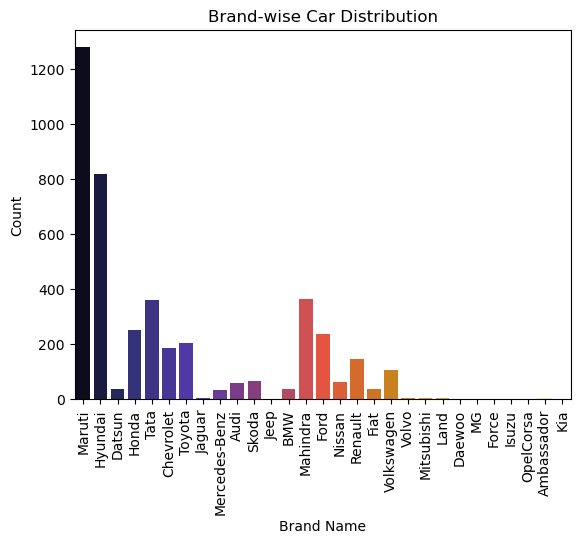

In [6]:
sns.countplot(data=df,x="company",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Brand Name")
plt.ylabel("Count")
plt.title("Brand-wise Car Distribution")
plt.show()

## Visualizing percentage distribution of cars by companies

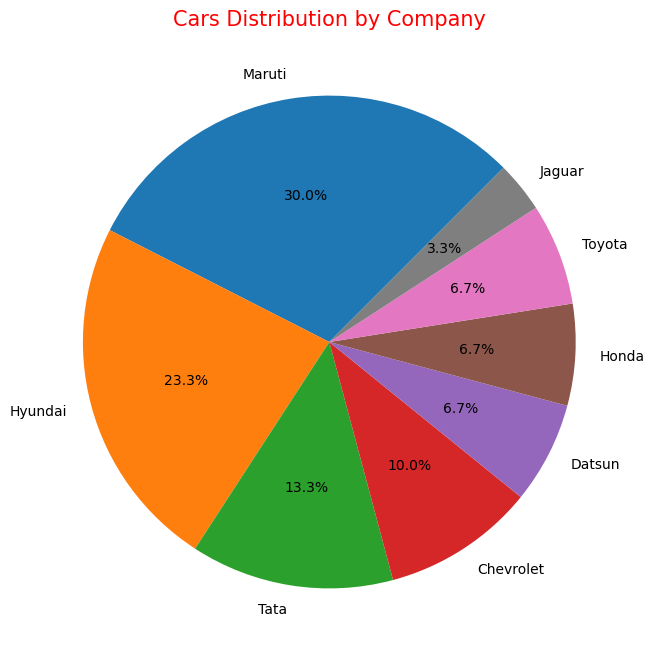

In [7]:
labels = df["company"][:30].value_counts().index
sizes = df["company"][:30].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%', startangle=45)
plt.title('Cars Distribution by Company',color = 'red',fontsize = 15)
plt.show()

## Getting car count by fuel type

In [8]:
df.fuel.value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

## Visualizing car count by fuel type

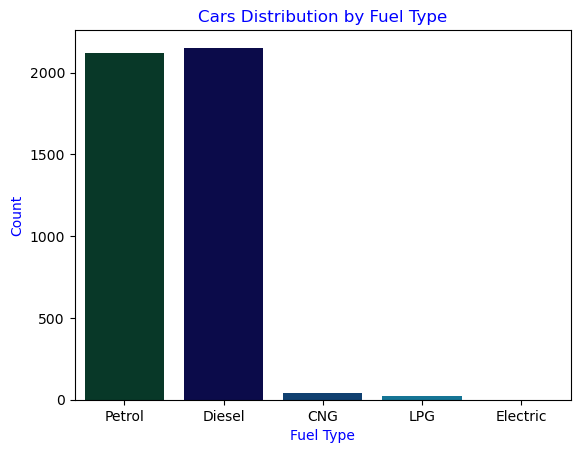

In [9]:
sns.countplot(data=df,x="fuel",palette="ocean")
plt.xlabel("Fuel Type",fontsize=10,color="blue")
plt.ylabel("Count",fontsize=10,color="blue")
plt.title("Cars Distribution by Fuel Type",color="b")
plt.show()

## Getting car count by seller type 

In [10]:
df.seller_type.value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

## Visualizing percentage distribution of cars by seller type

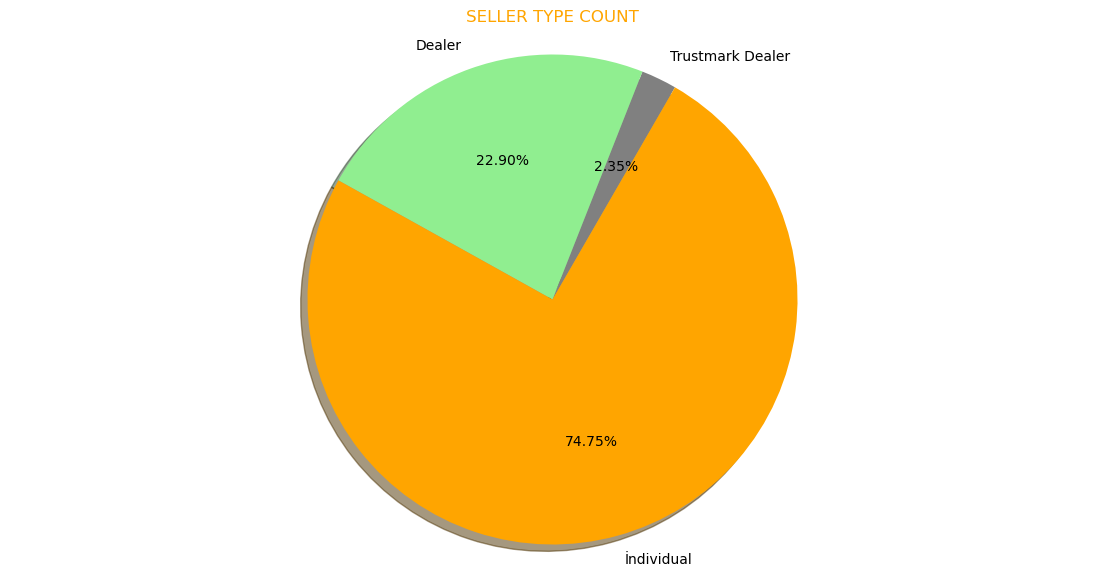

In [11]:
plt.figure(figsize=(14, 7))
labels=["Trustmark Dealer","Dealer","İndividual"]
plt.pie(df['seller_type'].value_counts().sort_values(),labels=labels,explode=[0,0,0],
        autopct='%1.2f%%',colors=['gray','lightgreen',"orange"], startangle=60,shadow=True)
plt.title("SELLER TYPE COUNT",color="orange")
plt.axis('equal')
plt.show()

## Getting cars count by transmission type

In [12]:
df.transmission.value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

## Visualizing percentage distribution of cars by transmission type

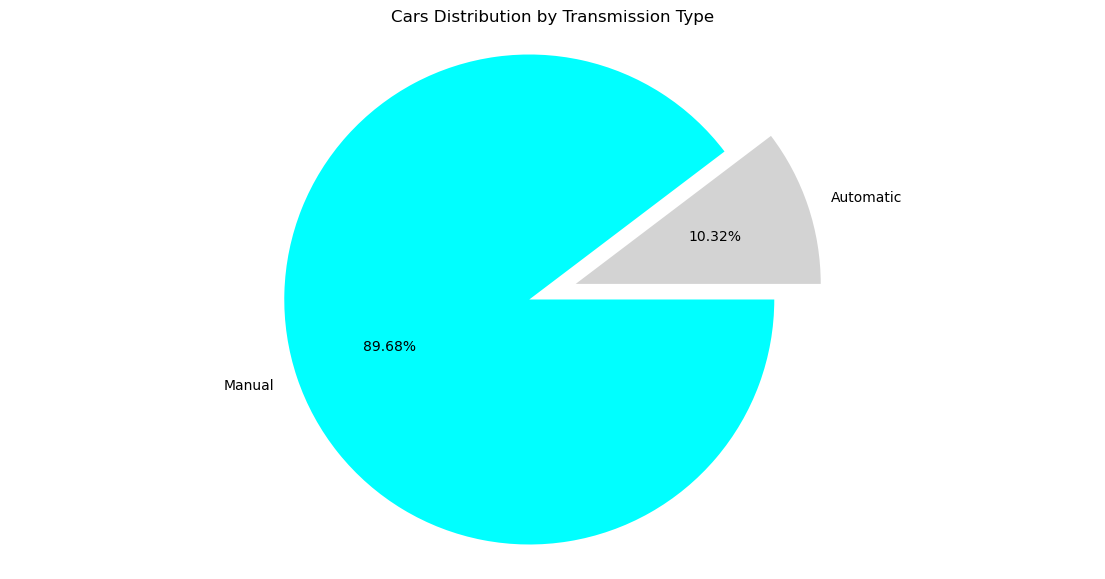

In [13]:
plt.figure(figsize=(14, 7))
labels=['Automatic', 'Manual']
plt.pie(df['transmission'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightgray','cyan'])
plt.title('Cars Distribution by Transmission Type')
plt.axis('equal')
plt.show()

## Getting car count by owner type

In [14]:
df.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

## Visualizing car count by owner type

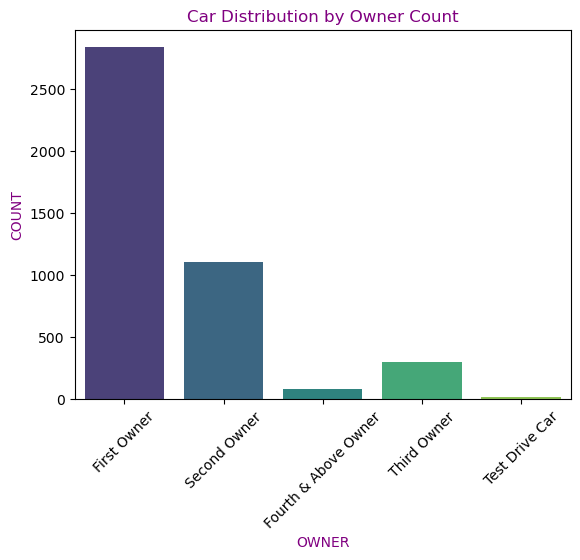

In [15]:
sns.countplot(data=df,x="owner",palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("OWNER",fontsize=10,color="purple")
plt.ylabel("COUNT",fontsize=10,color="purple")
plt.title("Car Distribution by Owner Count",color="purple")
plt.show()

## Visualizinfg car count by year & transmission

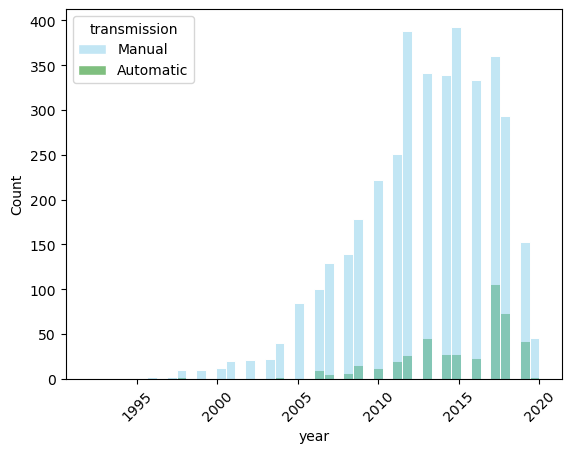

In [16]:
palette = {"Automatic": "green", "Manual": "skyblue"}
sns.histplot(data=df, x="year", hue="transmission", palette=palette, edgecolor='white')
plt.xticks(rotation=45)
plt.show()

## Visualizing car count by company and transmission type

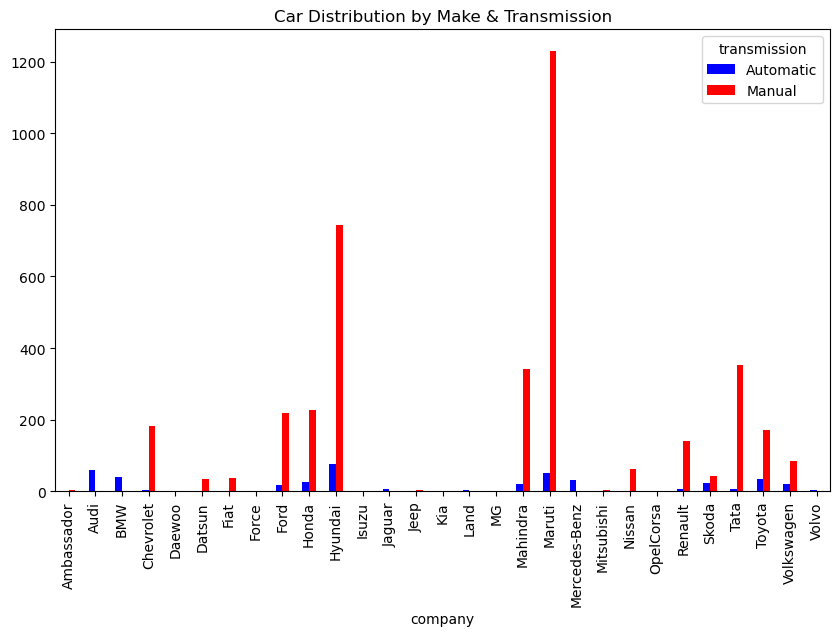

In [17]:
pd.crosstab(df["company"], df["transmission"]).plot(kind="bar", figsize=(10, 6), color=["blue","red"], title="Car Distribution by Make & Transmission")
plt.show()

# The best selling car is the Maruti with 30% percentage share. Next comes Hyundai.
# Cars are usually manual.
# We can say that vehicles are generally sold first-hand, followed by second-hand vehicles.
# Most of the sales are made individually.
# Most sales were made around 2017.
